# ***CODE CLAUSE PROJECT***

### **PROJECT NAME - Churn Prediction in Telecom Industry using Logistic Regression**

### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px

## **Importing Datasets**

In [2]:
telecom_data = pd.read_csv('D:/CODE CLAUSE DATA SCIENCE/CHURN PREDICTION/archive/Telco_Customer_Churn.csv')

In [3]:
telecom_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
telecom_data.shape

(7043, 21)

In [5]:
telecom_data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [6]:
# Checking Null Values
telecom_data.notnull().sum()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [7]:
#There is no missing value in our 

In [8]:
%matplotlib inline

In [10]:
telecom_hist = px.histogram(telecom_data, x='gender',color='Churn',marginal='box', color_discrete_sequence = ['red','grey'])
telecom_hist.update_layout(bargap=0.2)

<BarContainer object of 7043 artists>

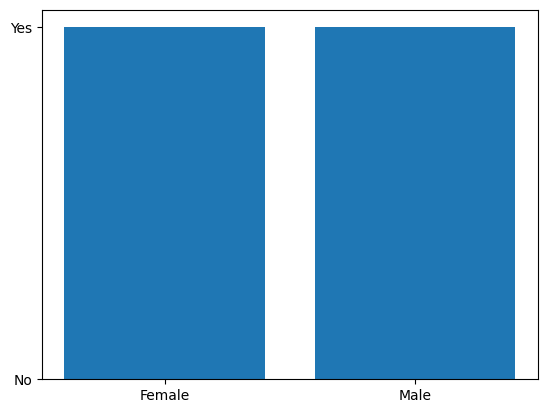

In [11]:
plt.bar(telecom_data['gender'],telecom_data['Churn'])

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

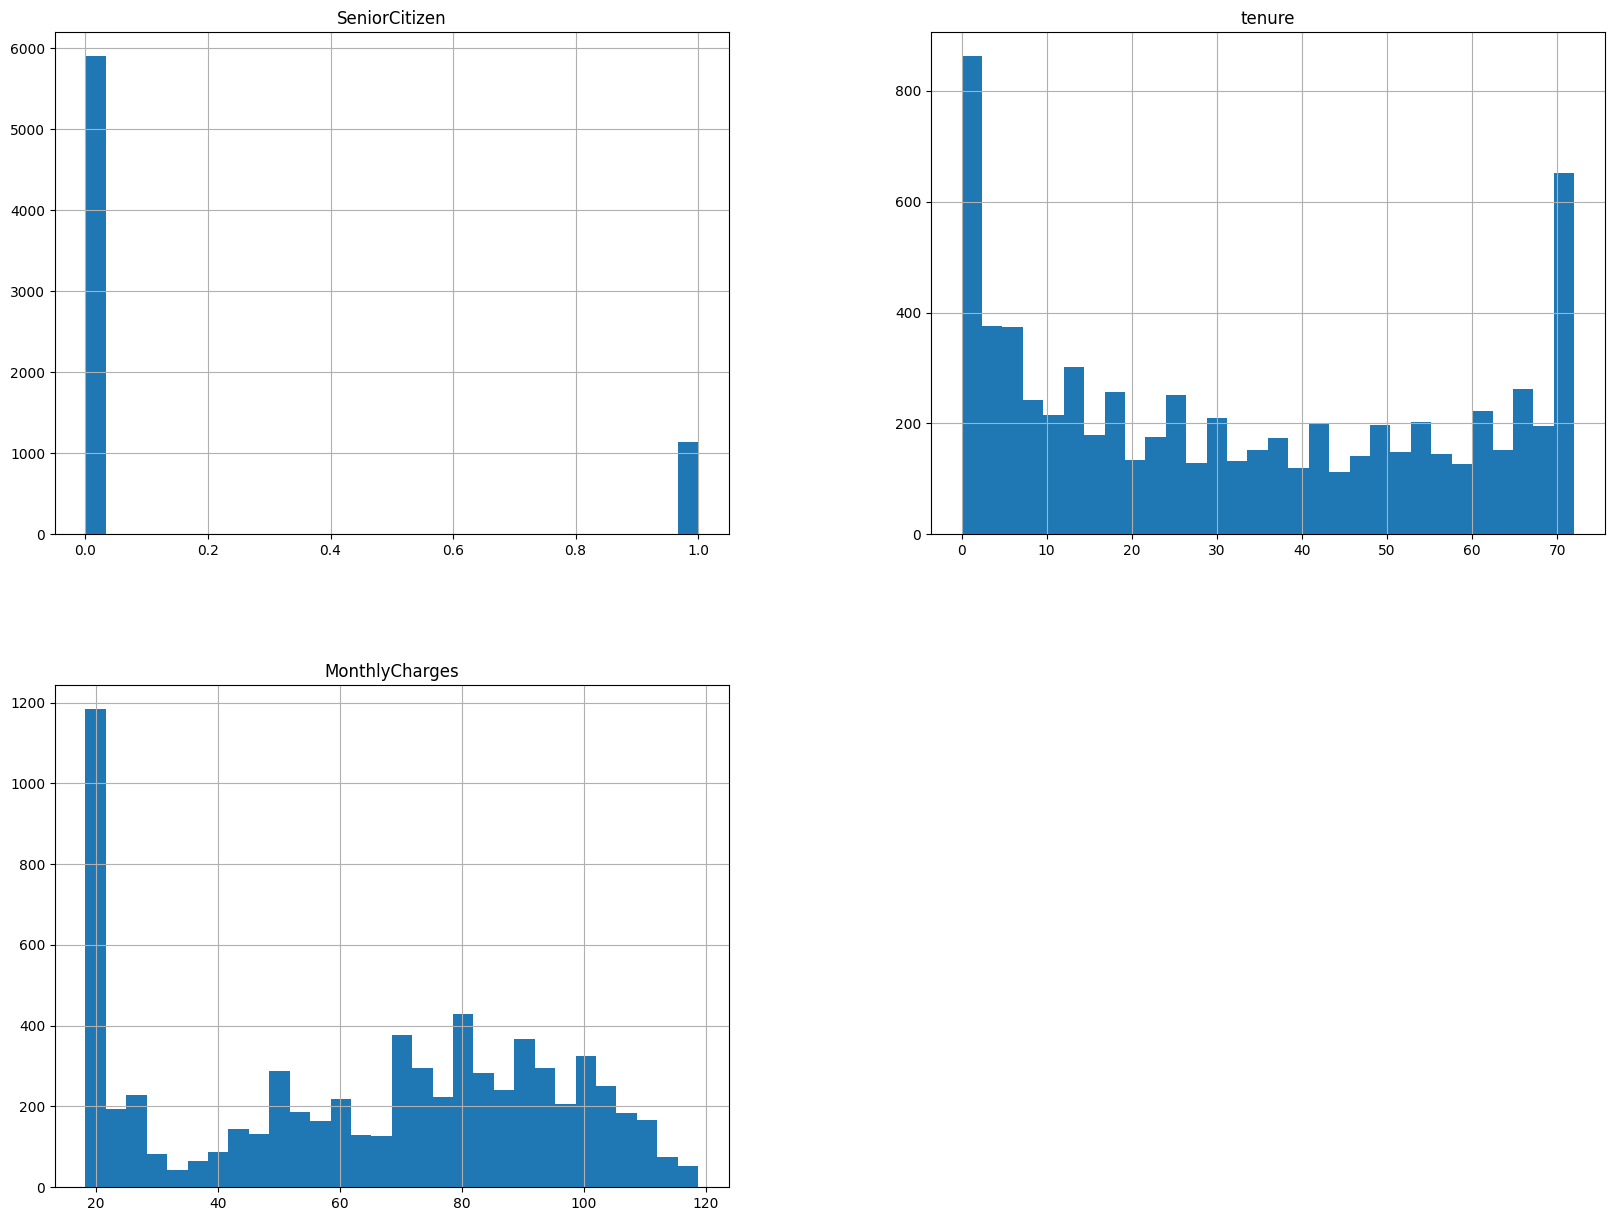

In [12]:
telecom_data.hist(bins = 30, figsize=(20,15))

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



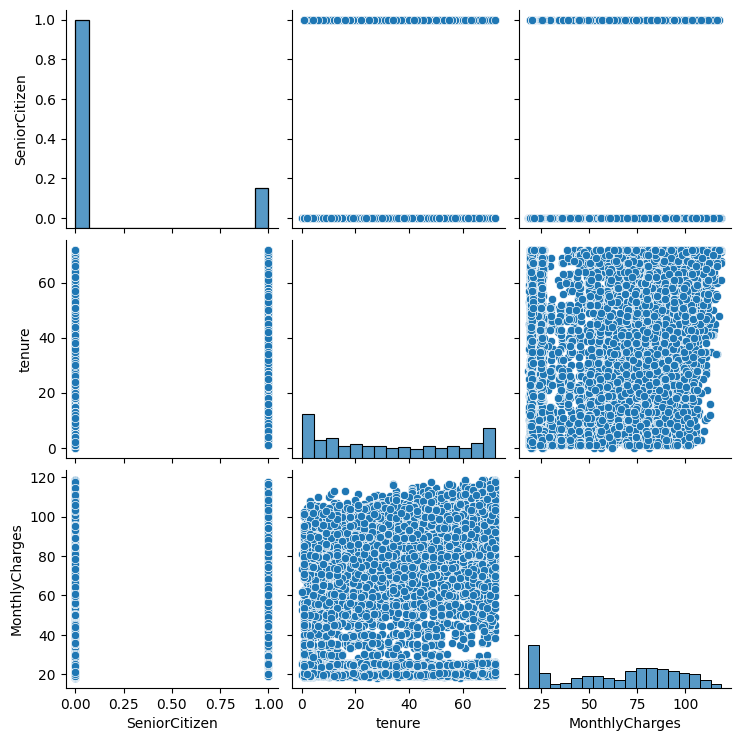

In [13]:
sns.pairplot(telecom_data)

### **Cleaning Data**

In [13]:
#Removing gender, customerID,tenture they are not usefull

In [14]:
col = ['gender','customerID','tenure']
telecom_data = telecom_data.drop(col,axis = 1)

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



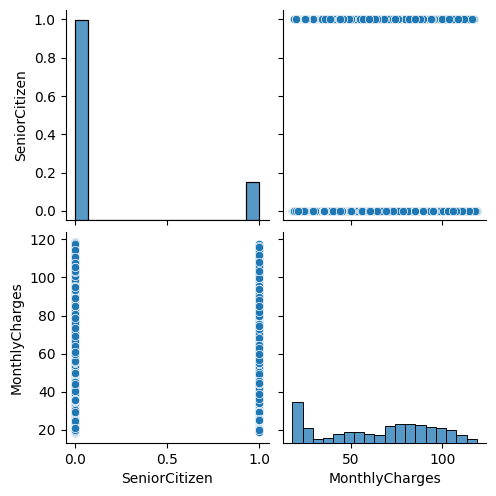

In [15]:
sns.pairplot(telecom_data)

In [16]:
telecom_data.head()

SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0              0     Yes         No           No  No phone service   
1              0      No         No          Yes                No   
2              0      No         No          Yes                No   
3              0      No         No           No  No phone service   
4              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0           Electronic check           29.85        29.85    No  
1               Mailed check           56.95       1889.5    No  
2               Mailed check           53.85       108.15   Yes  
3  Bank transfer (automatic)           42.30      1840.75    No  
4           Electronic check           70.70       151.65   Yes

In [17]:
telecom_data['TotalCharges'].notnull().sum()

7043

In [18]:
telecom_data['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [19]:
telecom_data['TotalCharges'].describe()
#the data type of the Total Charges is Object so we will change that

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [20]:
#due to string(" ") at 488 position you can not change the TotalCharges into Int
#so we will be removing/replacing that string which is --> " "
telecom_data['TotalCharges'] = telecom_data['TotalCharges'].replace(" ",np.nan)
telecom_data['TotalCharges'] = pd.to_numeric(telecom_data['TotalCharges'], errors = 'coerce') # coerce will replace all the non-numeric values with NaN
#dropping all the rows in which there is a null value
telecom_data = telecom_data.dropna(how = "any", axis = 0) #removing all the rows which have null value in it

In [21]:
telecom_data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [22]:
telecom_data.notnull().sum()

SeniorCitizen       7032
Partner             7032
Dependents          7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

In [23]:
#Total Charges has null values in it

In [24]:
telecom_data.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## ***EDA(Exploratory Data Analysis)***

In [25]:
telecom_data['Churn'].describe()

count     7032
unique       2
top         No
freq      5163
Name: Churn, dtype: object

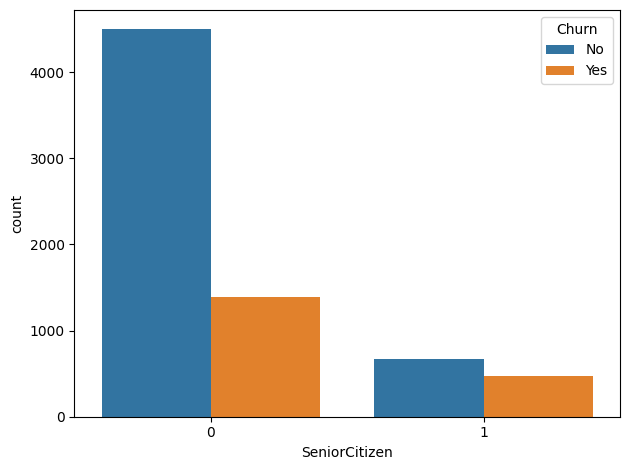

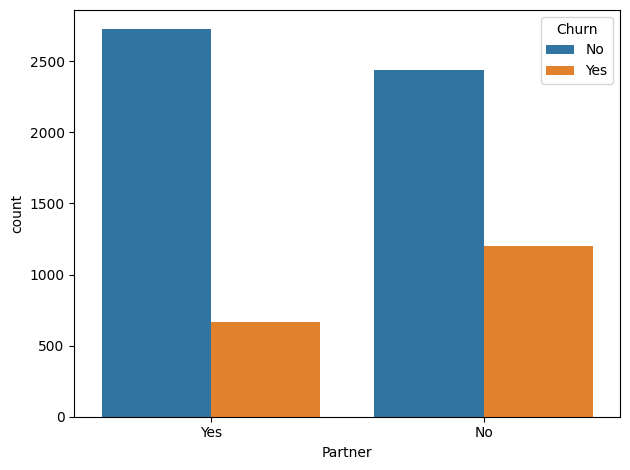

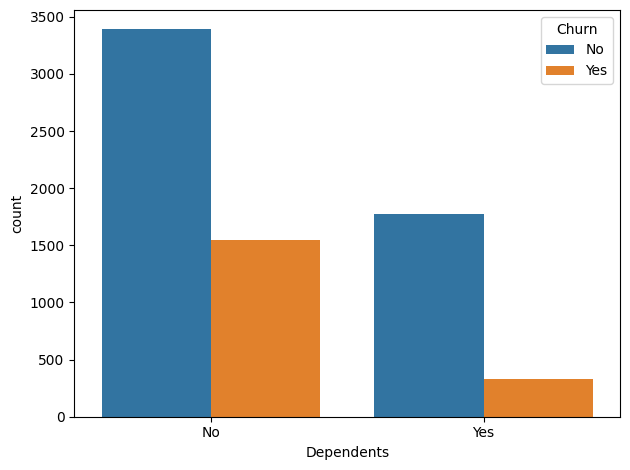

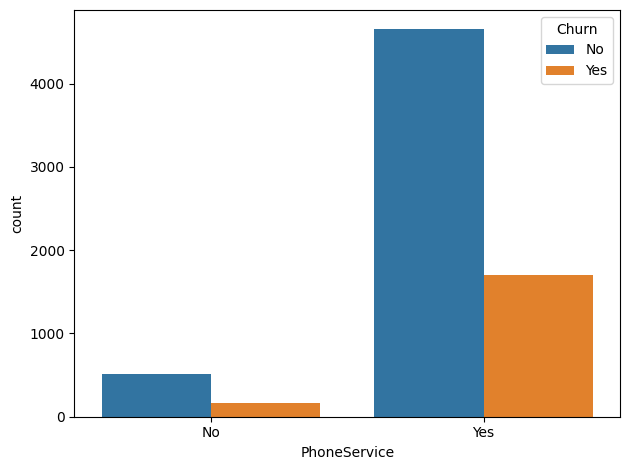

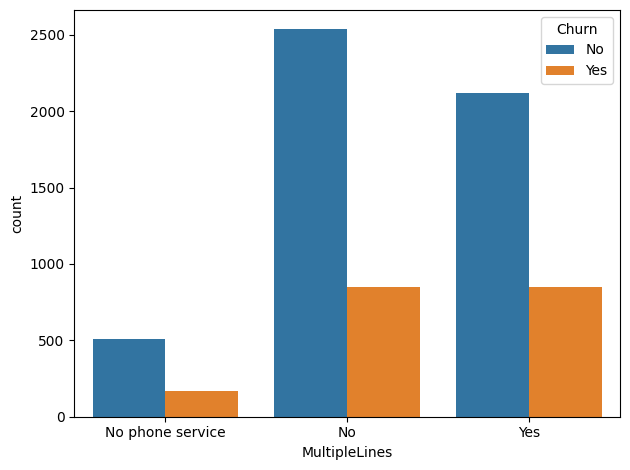

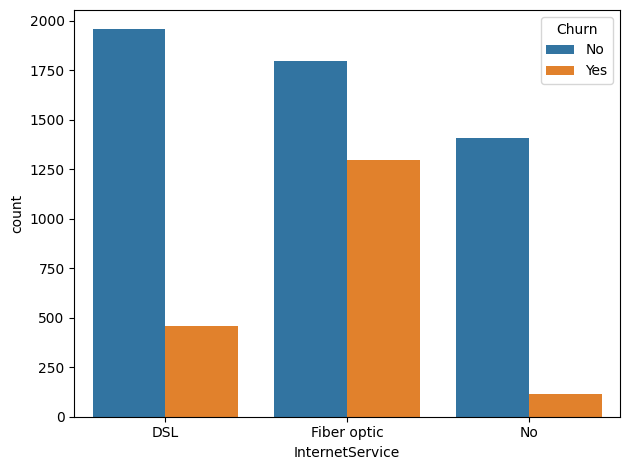

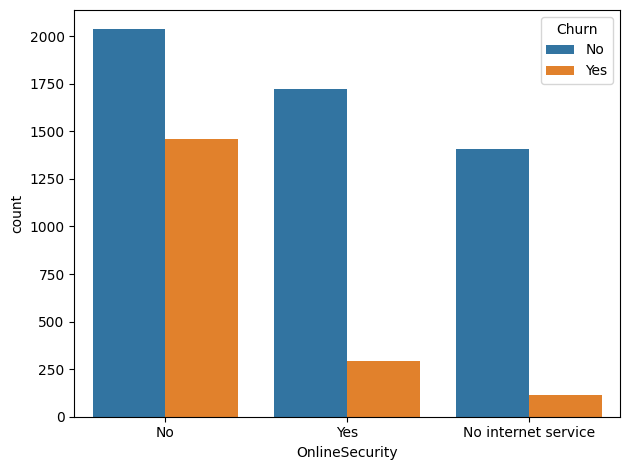

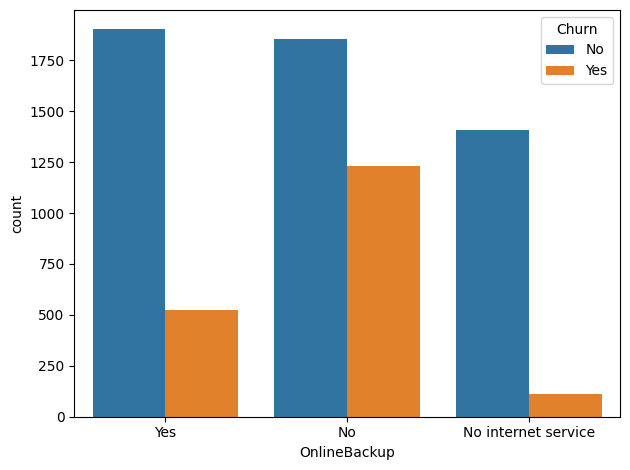

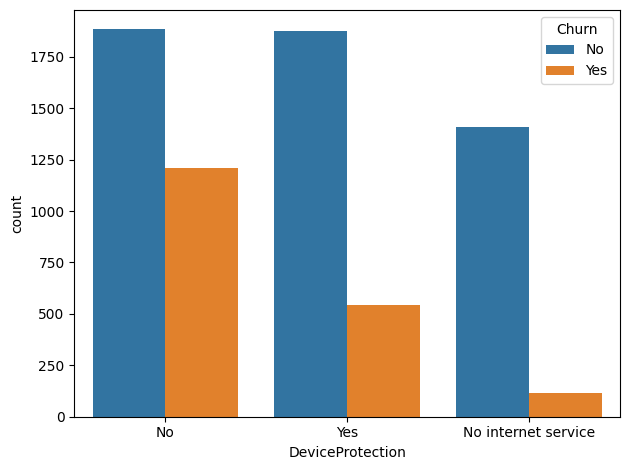

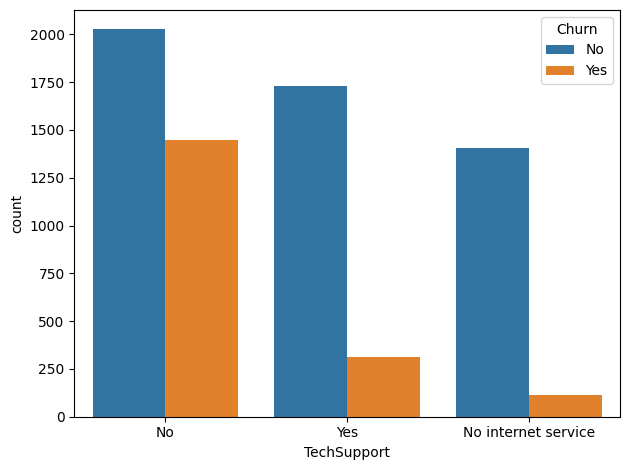

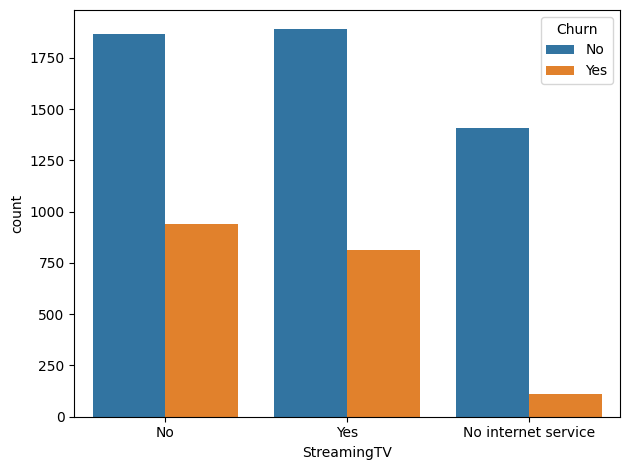

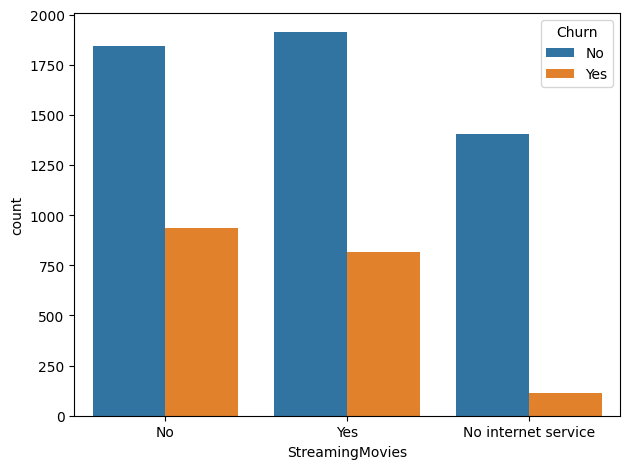

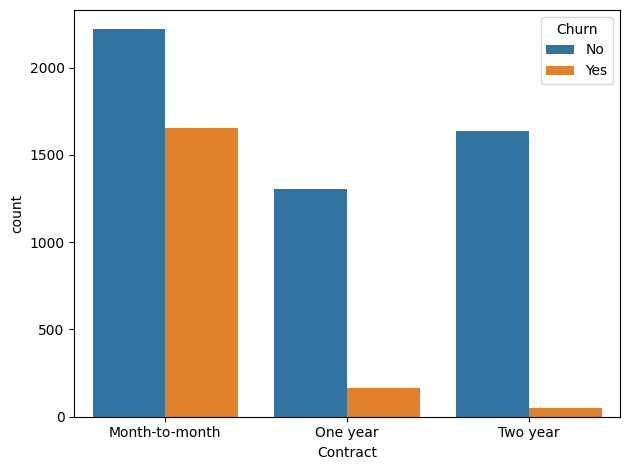

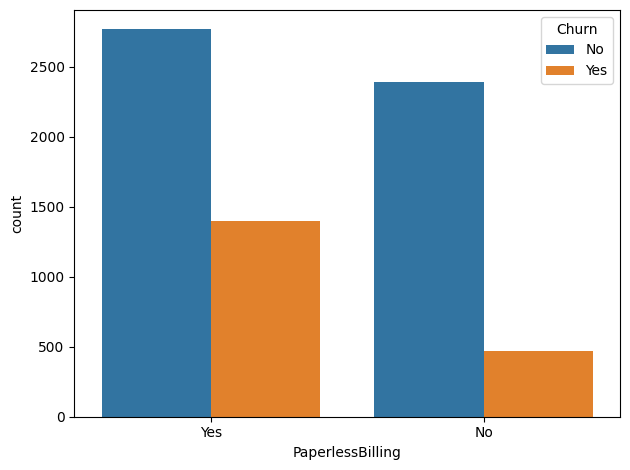

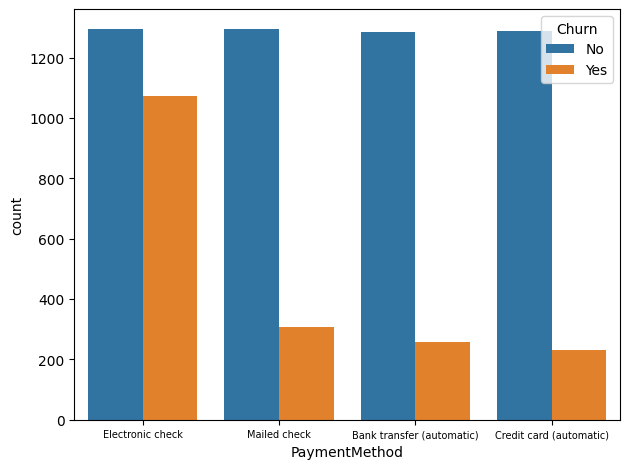

In [26]:
for i, predictor in enumerate(telecom_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    ax = sns.countplot(data =telecom_data, x = predictor, hue='Churn')
    if predictor == "PaymentMethod": 
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
        plt.tight_layout()
        plt.show()
    else:
        plt.tight_layout()
        plt.show()

In [27]:
#converting Yes as 1 and No as 0
telecom_data["Churn"] = telecom_data["Churn"].replace(['Yes','No'],[1,0])

C:\Users\USER\AppData\Local\Temp\ipykernel_11176\1073425660.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
telecom_data

SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0                 0     Yes         No           No  No phone service   
1                 0      No         No          Yes                No   
2                 0      No         No          Yes                No   
3                 0      No         No           No  No phone service   
4                 0      No         No          Yes                No   
...             ...     ...        ...          ...               ...   
7038              0     Yes        Yes          Yes               Yes   
7039              0     Yes        Yes          Yes               Yes   
7040              0     Yes        Yes           No  No phone service   
7041              1     Yes         No          Yes               Yes   
7042              0      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0              Electronic check           29.85         29.85      0  
1                  Mailed check           56.95       1889.50      0  
2                  Mailed check           53.85        108.15      1  
3     Bank transfer (automatic)           42.30       1840.75      0  
4              Electronic check           70.70        151.65      1  
...                         ...             ...           ...    ...  
7038               Mailed check           84.80       1990.50      0  
7039    Credit card (automatic)          103.20       7362.90      0  
7040           Electronic check           29.60        346.45      0  
7041               Mailed check           74.40        306.60      1  
7042  Bank transfer (automatic)          105.65       6844.50      0  

[7032 rows x 18 columns]

In [29]:
telecom_data_dummies = pd.get_dummies(telecom_data)

In [30]:
telecom_data_dummies

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  Partner_No  \
0                 0           29.85         29.85      0       False   
1                 0           56.95       1889.50      0        True   
2                 0           53.85        108.15      1        True   
3                 0           42.30       1840.75      0        True   
4                 0           70.70        151.65      1        True   
...             ...             ...           ...    ...         ...   
7038              0           84.80       1990.50      0       False   
7039              0          103.20       7362.90      0       False   
7040              0           29.60        346.45      0       False   
7041              1           74.40        306.60      1       False   
7042              0          105.65       6844.50      0        True   

      Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
0            True           True           False             True   
1           False           True           False            False   
2           False           True           False            False   
3           False           True           False             True   
4           False           True           False            False   
...           ...            ...             ...              ...   
7038         True          False            True            False   
7039         True          False            True            False   
7040         True          False            True             True   
7041         True           True           False            False   
7042        False           True           False            False   

      PhoneService_Yes  ...  StreamingMovies_Yes  Contract_Month-to-month  \
0                False  ...                False                     True   
1                 True  ...                False                    False   
2                 True  ...                False                     True   
3                False  ...                False                    False   
4                 True  ...                False                     True   
...                ...  ...                  ...                      ...   
7038              True  ...                 True                    False   
7039              True  ...                 True                    False   
7040             False  ...                False                     True   
7041              True  ...                False                     True   
7042              True  ...                 True                    False   

      Contract_One year  Contract_Two year  PaperlessBilling_No  \
0                 False              False                False   
1                  True              False                 True   
2                 False              False                False   
3                  True              False                 True   
4                 False              False                False   
...                 ...                ...                  ...   
7038               True              False                False   
7039               True              False                False   
7040              False              False                False   
7041              False              False                False   
7042              False               True                False   

      PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                     True                                    False   
1                    False                                    False   
2                     True                                    False   
3                    False                                     True   
4                     True                                    False   
...                    ...                                      ...   
7038                  True                                    False   
7039          

In [31]:
churn_corr_matrix = telecom_data_dummies.corr()

<Axes: >

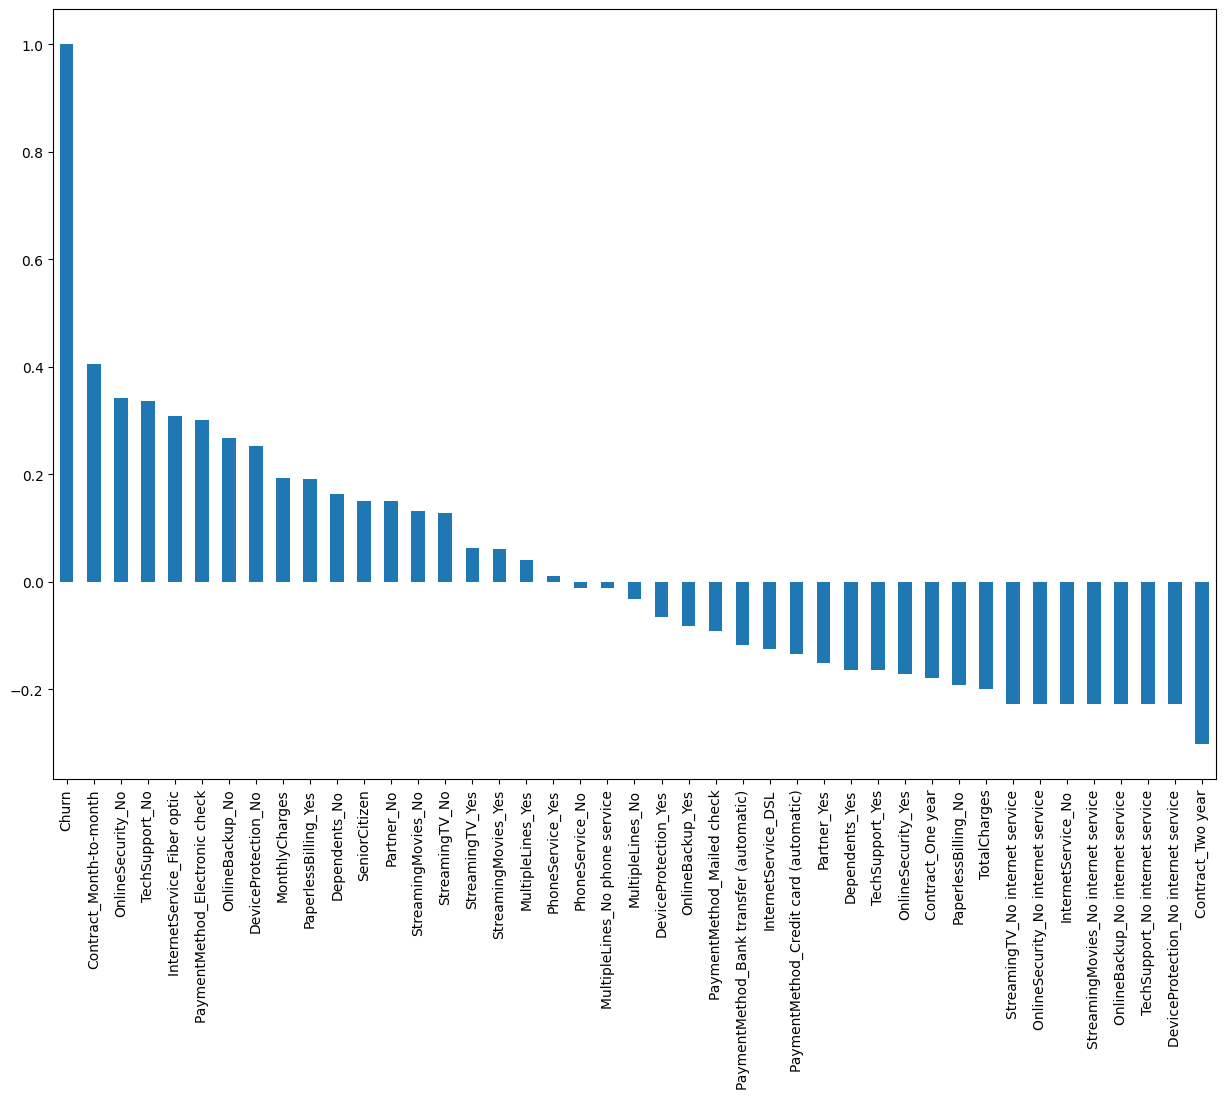

In [32]:
churn_corr_matrix['Churn'].sort_values(ascending = False).plot(kind='bar',figsize = (15,10))

In [33]:
churn_corr_matrix['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
PhoneService

In [34]:
x = telecom_data_dummies.drop('Churn',axis = 1)

In [35]:
x

SeniorCitizen  MonthlyCharges  TotalCharges  Partner_No  Partner_Yes  \
0                 0           29.85         29.85       False         True   
1                 0           56.95       1889.50        True        False   
2                 0           53.85        108.15        True        False   
3                 0           42.30       1840.75        True        False   
4                 0           70.70        151.65        True        False   
...             ...             ...           ...         ...          ...   
7038              0           84.80       1990.50       False         True   
7039              0          103.20       7362.90       False         True   
7040              0           29.60        346.45       False         True   
7041              1           74.40        306.60       False         True   
7042              0          105.65       6844.50        True        False   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0              True           False             True             False   
1              True           False            False              True   
2              True           False            False              True   
3              True           False             True             False   
4              True           False            False              True   
...             ...             ...              ...               ...   
7038          False            True            False              True   
7039          False            True            False              True   
7040          False            True             True             False   
7041           True           False            False              True   
7042           True           False            False              True   

      MultipleLines_No  ...  StreamingMovies_Yes  Contract_Month-to-month  \
0                False  ...                False                     True   
1                 True  ...                False                    False   
2                 True  ...                False                     True   
3                False  ...                False                    False   
4                 True  ...                False                     True   
...                ...  ...                  ...                      ...   
7038             False  ...                 True                    False   
7039             False  ...                 True                    False   
7040             False  ...                False                     True   
7041             False  ...                False                     True   
7042              True  ...                 True                    False   

      Contract_One year  Contract_Two year  PaperlessBilling_No  \
0                 False              False                False   
1                  True              False                 True   
2                 False              False                False   
3                  True              False                 True   
4                 False              False                False   
...                 ...                ...                  ...   
7038               True              False                False   
7039               True              False                False   
7040              False              False                False   
7041              False              False                False   
7042              False               True                False   

      PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                     True                                    False   
1                    False                                    False   
2                     True                                    False   
3                    False                                     True   
4                     True                                    False   
...                    .

In [36]:
y = telecom_data_dummies['Churn']

In [37]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [38]:
x.shape

(7032, 42)

In [39]:
y.shape

(7032,)

In [40]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

## ***Variable Imbalancing***

### **SMOTE for Imbalanced Classification with Python**

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
smote = SMOTE(random_state=0)

In [43]:
x_resampled_smote, y_resampled_smote = smote.fit_resample(x,y)

In [44]:
y_resampled_smote.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [45]:
x_resampled_smote

SeniorCitizen  MonthlyCharges  TotalCharges  Partner_No  Partner_Yes  \
0                  0       29.850000     29.850000       False         True   
1                  0       56.950000   1889.500000        True        False   
2                  0       53.850000    108.150000        True        False   
3                  0       42.300000   1840.750000        True        False   
4                  0       70.700000    151.650000        True        False   
...              ...             ...           ...         ...          ...   
10321              0      103.976753    242.804921       False         True   
10322              0       35.824447     35.824447        True        False   
10323              0       44.493077   1061.960339        True         True   
10324              0       19.363055     19.363055        True        False   
10325              0       96.922890     96.922890        True        False   

       Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0               True           False             True             False   
1               True           False            False              True   
2               True           False            False              True   
3               True           False             True             False   
4               True           False            False              True   
...              ...             ...              ...               ...   
10321           True           False            False              True   
10322           True           False             True             False   
10323           True            True             True              True   
10324           True           False            False              True   
10325           True           False            False              True   

       MultipleLines_No  ...  StreamingMovies_Yes  Contract_Month-to-month  \
0                 False  ...                False                     True   
1                  True  ...                False                    False   
2                  True  ...                False                     True   
3                 False  ...                False                    False   
4                  True  ...                False                     True   
...                 ...  ...                  ...                      ...   
10321             False  ...                 True                     True   
10322             False  ...                 True                     True   
10323              True  ...                False                     True   
10324              True  ...                False                     True   
10325             False  ...                 True                     True   

       Contract_One year  Contract_Two year  PaperlessBilling_No  \
0                  False              False                False   
1                   True              False                 True   
2                  False              False                False   
3                   True              False                 True   
4                  False              False                False   
...                  ...                ...                  ...   
10321              False              False                False   
10322              False              False                 True   
10323              False              False                 True   
10324              False              False                False   
10325              False              False                 True   

       PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                      True                                    False   
1                     False                                    False   
2                      True                                    False   
3                     False                                     True   
4                      True                

In [46]:
y_resampled_smote.notnull().sum()

10326

In [47]:
x_resampled_smote.notnull().sum()

SeniorCitizen                              10326
MonthlyCharges                             10326
TotalCharges                               10326
Partner_No                                 10326
Partner_Yes                                10326
Dependents_No                              10326
Dependents_Yes                             10326
PhoneService_No                            10326
PhoneService_Yes                           10326
MultipleLines_No                           10326
MultipleLines_No phone service             10326
MultipleLines_Yes                          10326
InternetService_DSL                        10326
InternetService_Fiber optic                10326
InternetService_No                         10326
OnlineSecurity_No                          10326
OnlineSecurity_No internet service         10326
OnlineSecurity_Yes                         10326
OnlineBackup_No                            10326
OnlineBackup_No internet service           10326
OnlineBackup_Yes    

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
#checking on imbalance data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
LogReg = LogisticRegression(solver='lbfgs', max_iter=1000,multi_class='multinomial')

In [51]:
LogReg.fit(x_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [52]:
y_pred = LogReg.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test,y_pred)

0.7853589196872779

In [55]:
#checking on balanced data
x_smote_train,x_smote_test,y_smote_train,y_smote_test = train_test_split(x_resampled_smote,y_resampled_smote,test_size=0.2,random_state=42)

In [56]:
LogReg.fit(x_smote_train,y_smote_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [57]:
y_smote_pred = LogReg.predict(x_smote_test)

In [58]:
accuracy_score(y_smote_test,y_smote_pred)

0.8388189738625363

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
std = StandardScaler()

In [61]:
std_train = std.fit_transform(x_smote_train)
std_test = std.transform(x_smote_test)

In [62]:
LogReg.fit(std_train,y_smote_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [63]:
std_pred = LogReg.predict(std_test)

In [64]:
accuracy_score(std_pred,y_smote_test)

0.8407550822846079

In [65]:
np.where(std_pred!=y_smote_test)

(array([  14,   20,   24,   31,   43,   48,   49,   57,   60,   63,   80,
          81,   83,   87,   90,   98,  100,  102,  107,  108,  117,  118,
         125,  126,  130,  136,  161,  162,  183,  193,  194,  207,  230,
         236,  272,  274,  287,  289,  291,  296,  300,  306,  313,  321,
         327,  328,  329,  330,  333,  335,  341,  346,  348,  359,  376,
         380,  393,  397,  400,  414,  415,  421,  425,  427,  428,  434,
         435,  439,  442,  449,  451,  463,  479,  489,  490,  491,  499,
         509,  515,  521,  530,  532,  543,  546,  551,  555,  556,  562,
         563,  571,  573,  575,  585,  588,  595,  602,  608,  612,  625,
         629,  637,  645,  661,  691,  695,  705,  710,  724,  734,  739,
         756,  757,  760,  774,  777,  783,  785,  789,  790,  791,  794,
         799,  805,  814,  820,  821,  841,  855,  862,  865,  866,  869,
         870,  874,  883,  888,  899,  902,  904,  909,  912,  921,  927,
         929,  932,  938,  940,  947, 

In [66]:
y_smote_test.shape

(2066,)